In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

In [46]:
Digits = True
path = "C:/Users\Toonv\OneDrive\Documenten\Sound recordings\Recording.wav"
# path = "C:/Users\Toonv\OneDrive\Documents\Sound Recordings/Recording.wav"



In [47]:
if Digits:
    label_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    imported = tf.saved_model.load("saved-Digit")
    HZ = 8000
else:
    label_names = ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']
    imported = tf.saved_model.load("saved-Words")
    HZ = 16000


In [48]:
prediction = imported(path)
samples, sample_rate = librosa.load(path, sr=HZ)
samples = librosa.resample(samples, sample_rate, HZ)
result = np.argmax(prediction[0])

C:\Users\Toonv\AppData\Local\Temp\ipykernel_9484\1254746655.py:3: FutureWarning: Pass orig_sr=8000, target_sr=8000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  samples = librosa.resample(samples, sample_rate, HZ)


In [49]:
ipd.display(ipd.Audio(samples, rate=HZ))

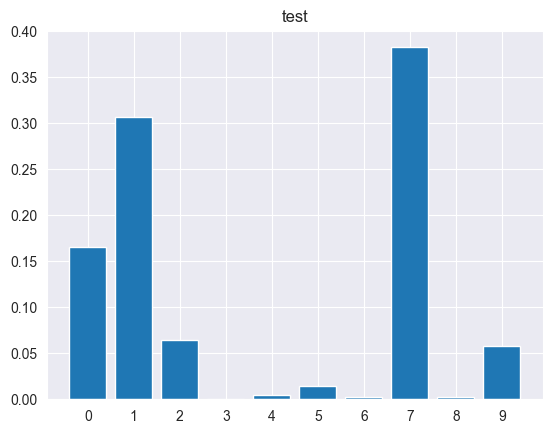

'7'

In [50]:
plt.bar(label_names, tf.nn.softmax(prediction[0]))
plt.title('test')
plt.show()
label_names[result]